In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9a84811c-e3de-4d16-97c8-62b9f9c5077c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go into Anaconda Prompt and enter "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

In [11]:
type(data)

dict

In [12]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10817,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962799e+07,1.962799e+07,False,NaN,1,NaN,NaN,None,2024-02-14T23:02:00.000Z,51818.754250,3.898753e+10,8.9927,0.028435,4.671451,17.306918,21.716535,22.587555,43.306515,1.017098e+12,52.5521,1.088194e+12,None,2024-02-14T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:03:24.724603
1,1027,Ethereum,ETH,ethereum,8410,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201673e+08,1.201673e+08,True,NaN,2,NaN,NaN,None,2024-02-14T23:02:00.000Z,2773.259587,2.128208e+10,14.3689,-0.373576,5.303509,14.333807,10.433060,24.548126,41.028384,3.332551e+11,17.2110,3.332551e+11,None,2024-02-14T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:03:24.724603
2,825,Tether USDt,USDT,tether,74653,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.696133e+10,9.960063e+10,True,NaN,3,NaN,NaN,None,2024-02-14T23:01:00.000Z,1.000814,6.404096e+10,9.8543,-0.009241,-0.017192,0.107094,0.156170,0.155683,0.058148,9.704027e+10,5.0158,9.968171e+10,None,2024-02-14T23:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-14 15:03:24.724603
3,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.374279e+08,5.695415e+08,True,NaN,4,NaN,NaN,None,2024-02-14T23:02:00.000Z,117.249628,2.382755e+09,-13.2108,0.167985,4.623216,16.174976,24.611986,58.532329,101.266061,5.128826e+10,2.6488,6.677853e+10,None,2024-02-14T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:03:24.724603
4,1839,BNB,BNB,bnb,2063,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495449e+08,1.495449e+08,False,NaN,5,NaN,NaN,None,2024-02-14T23:01:00.000Z,334.131919,8.865202e+08,-0.9461,-0.009246,2.882562,8.469371,5.791842,36.420431,37.495134,4.996772e+10,2.5827,4.996772e+10,None,2024-02-14T23:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:03:24.724603
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.450697e+10,9.998791e+10,False,NaN,6,NaN,NaN,None,2024-02-14T23:02:00.000Z,0.539511,1.168708e+09,16.0736,-0.083778,2.583239,5.366085,-6.624673,-12.912143,-12.386940,2.940713e+10,1.5187,5.395113e+10,None,2024-02-14T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:03:24.724603
6,3408,USDC,USDC,usd-coin,16700,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.800856e+10,2.800856e+10,False,NaN,7,NaN,NaN,None,2024-02-14T23:02:00.000Z,1.000036,6.642653e+09,-3.3584,0.006379,-0.003537,0.007823,-0.020648,0.000797,-0.000932,2.800957e+10,1.4466,2.800957e+10,None,2024-02-14T23:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-14 15:03:24.724603
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.545141e+10,3.661393e+10,False,NaN,8,NaN,NaN,None,2024-02-14T23:01:00.000Z,0.577836,5.684985e+08,21.1661,0.070329,6.164718,15.580225,9.364513,-5.318821,55.339216,2.048511e+10,1.0588,2.600263e+10,None,2024-02-14T23:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:03:24.724603
8,5805,Avalanche,AVAX,avalanche,663,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.20000

In [48]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9a84811c-e3de-4d16-97c8-62b9f9c5077c',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

In [49]:
import os 
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [50]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10817,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19628143.00000,19628143.00000,False,NaN,1,NaN,NaN,None,2024-02-15T03:34:00.000Z,52277.45542,42892268627.93849,25.92230,0.39858,5.43735,17.14102,22.15565,24.68289,43.69708,1026109370662.73083,52.57920,1097826563823.04004,None,2024-02-15T03:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 19:35:08.362211
1,1027,Ethereum,ETH,ethereum,8410,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120166914.20327,120166914.20327,True,NaN,2,NaN,NaN,None,2024-02-15T03:34:00.000Z,2794.37015,23579688971.88150,40.59630,0.03501,5.86322,14.81196,10.78532,26.07083,41.04542,335790837664.58087,17.19380,335790837664.58002,None,2024-02-15T03:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 19:35:08.362211
2,825,Tether USDt,USDT,tether,74654,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96961330982.85764,99600626148.56953,True,NaN,3,NaN,NaN,None,2024-02-15T03:33:00.000Z,1.00084,70315336483.69102,27.88470,0.00866,0.02913,0.11295,0.12429,0.17445,0.04946,97042890815.40164,4.96900,99684406046.25999,None,2024-02-15T03:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-14 19:35:08.362211
3,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437403007.88094,569541111.30588,True,NaN,4,NaN,NaN,None,2024-02-15T03:34:00.000Z,117.26963,2547406942.81123,7.40240,0.63451,4.77205,14.98035,22.35833,59.99497,100.73762,51294089134.50777,2.62650,66789875704.38000,None,2024-02-15T03:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 19:35:08.362211
4,1839,BNB,BNB,bnb,2063,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544878.57029,149544878.57029,False,NaN,5,NaN,NaN,None,2024-02-15T03:33:00.000Z,341.68441,1061062104.17144,22.61540,-0.55565,4.85280,9.68517,8.80066,40.60354,40.00867,51097153522.43945,2.61640,51097153522.44000,None,2024-02-15T03:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 19:35:08.362211
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54506969135.00000,99987912526.00000,False,NaN,6,NaN,NaN,None,2024-02-15T03:34:00.000Z,0.55378,1381744922.47433,36.90750,2.13709,5.56943,7.99206,-3.81298,-10.48554,-10.59512,30184859484.06587,1.54560,55377981867.43000,None,2024-02-15T03:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 19:35:08.362211
6,3408,USDC,USDC,usd-coin,16701,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28003325796.04691,28003325796.04691,False,NaN,7,NaN,NaN,None,2024-02-15T03:34:00.000Z,0.99994,7227527840.78495,11.28420,-0.01152,-0.00764,0.00457,-0.02032,-0.00854,-0.03158,28001698861.27014,1.43380,28001698861.27000,None,2024-02-15T03:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-14 19:35:08.362211
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35451405361.62500,36628205944.37800,False,NaN,8,NaN,NaN,None,2024-02-15T03:33:00.000Z,0.58053,620001416.37052,43.90370,0.23152,6.18547,13.88819,8.91037,-4.51101,54.89393,20580544761.01823,1.05380,26123774355.31000,None,2024-02-15T03:33:00.000Z,NaN,Na

In [22]:
# Tranforming the scientific notation to traditional form

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10817,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19627993.00000,19627993.00000,False,NaN,1,NaN,NaN,None,2024-02-14T23:28:00.000Z,51817.73070,39016292433.46167,9.32430,0.19723,4.61140,17.26063,21.95729,22.84003,43.32224,1017078055508.01270,52.54980,1088172344756.19995,None,2024-02-14T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:28:57.467541
1,1027,Ethereum,ETH,ethereum,8410,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120167306.19819,120167306.19819,True,NaN,2,NaN,NaN,None,2024-02-14T23:28:00.000Z,2778.68957,21353275584.75246,16.04220,0.24043,5.38499,14.58817,10.52472,24.99986,41.91900,333907640546.37347,17.24180,333907640546.37000,None,2024-02-14T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:28:57.467541
2,825,Tether USDt,USDT,tether,74653,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96961330982.85764,99600626148.56953,True,NaN,3,NaN,NaN,None,2024-02-14T23:27:00.000Z,1.00092,64128897218.87132,10.56180,0.01217,0.04144,0.11567,0.15313,0.17118,0.09831,97050407284.58130,5.01130,99692127114.33000,None,2024-02-14T23:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-14 15:28:57.467541
3,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437427891.82445,569541469.74939,True,NaN,4,NaN,NaN,None,2024-02-14T23:28:00.000Z,117.18352,2372556795.88086,-13.61130,0.22089,4.52391,15.85912,24.46421,59.97730,106.27222,51259338701.73089,2.64680,66740872377.39000,None,2024-02-14T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:28:57.467541
4,1839,BNB,BNB,bnb,2063,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544900.96245,149544900.96245,False,NaN,5,NaN,NaN,None,2024-02-14T23:27:00.000Z,333.66597,885140478.77858,-0.92160,-0.16994,2.71444,8.37403,5.29681,36.45061,38.04516,49898043930.12547,2.57660,49898043930.13000,None,2024-02-14T23:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:28:57.467541
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54506969135.00000,99987912526.00000,False,NaN,6,NaN,NaN,None,2024-02-14T23:28:00.000Z,0.53931,1171861800.03544,16.52360,-0.39786,2.61456,5.23514,-6.32303,-12.93945,-11.55805,29395980708.58729,1.51790,53930682947.68000,None,2024-02-14T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 15:28:57.467541
6,3408,USDC,USDC,usd-coin,16700,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28008555424.05648,28008555424.05648,False,NaN,7,NaN,NaN,None,2024-02-14T23:28:00.000Z,1.00002,6656361713.86835,-2.72970,-0.00590,0.00194,-0.00420,-0.01213,-0.00671,0.00512,28009099746.38914,1.44630,28009099746.39000,None,2024-02-14T23:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-14 15:28:57.467541
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35451407267.87200,36613928911.92100,False,NaN,8,NaN,NaN,None,2024-02-14T23:27:00.000Z,0.57732,571677232.10326,22.93350,0.00518,6.10798,15.19798,9.25381,-4.86219,57.86402,20466811460.45755,1.05680,25979406367.75000,None,2024-02-14T23:27:00.000Z,NaN,Na

In [24]:
# Looking at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.19723,4.61140,17.26063,21.95729,22.84003,43.32224
Ethereum,0.24043,5.38499,14.58817,10.52472,24.99986,41.91900
Tether USDt,0.01217,0.04144,0.11567,0.15313,0.17118,0.09831
Solana,0.22089,4.52391,15.85912,24.46421,59.97730,106.27222
BNB,-0.16994,2.71444,8.37403,5.29681,36.45061,38.04516
XRP,-0.39786,2.61456,5.23514,-6.32303,-12.93945,-11.55805
USDC,-0.00590,0.00194,-0.00420,-0.01213,-0.00671,0.00512
Cardano,0.00518,6.10798,15.19798,9.25381,-4.86219,57.86402
Avalanche,0.47348,6.84860,19.63231,19.19780,0.52071,97.66265


In [25]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.19723
             quote.USD.percent_change_24h     4.61140
             quote.USD.percent_change_7d     17.26063
             quote.USD.percent_change_30d    21.95729
             quote.USD.percent_change_60d    22.84003
             quote.USD.percent_change_90d    43.32224
Ethereum     quote.USD.percent_change_1h      0.24043
             quote.USD.percent_change_24h     5.38499
             quote.USD.percent_change_7d     14.58817
             quote.USD.percent_change_30d    10.52472
             quote.USD.percent_change_60d    24.99986
             quote.USD.percent_change_90d    41.91900
Tether USDt  quote.USD.percent_change_1h      0.01217
             quote.USD.percent_change_24h     0.04144
             quote.USD.percent_change_7d      0.11567
             quote.USD.percent_change_30d     0.15313
             quote.USD.percent_change_60d     0.17118
             quote.USD.percent_change_90

In [27]:
#type(df3)
type(df4)

pandas.core.series.Series

In [28]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.19723
            quote.USD.percent_change_24h   4.61140
            quote.USD.percent_change_7d   17.26063
            quote.USD.percent_change_30d  21.95729
            quote.USD.percent_change_60d  22.84003
            quote.USD.percent_change_90d  43.32224
Ethereum    quote.USD.percent_change_1h    0.24043
            quote.USD.percent_change_24h   5.38499
            quote.USD.percent_change_7d   14.58817
            quote.USD.percent_change_30d  10.52472
            quote.USD.percent_change_60d  24.99986
            quote.USD.percent_change_90d  41.91900
Tether USDt quote.USD.percent_change_1h    0.01217
            quote.USD.percent_change_24h   0.04144
            quote.USD.percent_change_7d    0.11567
            quote.USD.percent_change_30d   0.15313
            quote.USD.percent_change_60d   0.17118
            quote.USD.percent_change_90d   0.09831
Solana      quote.USD.percent_change_1h    0.22089
            quote.USD.percent_change_24h   4.52391
            quote.USD.percent_change_7d   15.85912
            quote.USD.percent_change_30d  24.46421
            quote.USD.percent_change_60d  59.97730
            quote.USD.percent_change_90d 106.27222
BNB         quote.USD.percent_change_1h   -0.16994
            quote.USD.percent_change_24h   2.71444
            quote.USD.percent_change_7d    8.37403
            quote.USD.percent_change_30d   5.29681
            quote.USD.percent_change_60d  36.45061
            quote.USD.percent_change_90d  38.04516
XRP         quote.USD.percent_change_1h   -0.39786
            quote.USD.percent_change_24h   2.61456
            quote.USD.percent_change_7d    5.23514
            quote.USD.percent_change_30d  -6.32303
            quote.USD.percent_change_60d -12.93945
            quote.USD.percent_change_90d -11.55805
USDC        quote.USD.percent_change_1h   -0.00590
            quote.USD.percent_change_24h   0.00194
            quote.USD.percent_change_7d   -0.00420
            quote.USD.percent_change_30d  -0.01213
            quote.USD.percent_change_60d  -0.00671
            quote.USD.percent_change_90d   0.00512
Cardano     quote.USD.percent_change_1h    0.00518
            quote.USD.percent_change_24h   6.10798
            quote.USD.percent_change_7d   15.19798
            quote.USD.percent_change_30d   9.25381
            quote.USD.percent_change_60d  -4.86219
            quote.USD.percent_change_90d  57.86402
Avalanche   quote.USD.percent_change_1h    0.47348
            quote.USD.percent_change_24h   6.84860
            quote.USD.percent_change_7d   19.63231
            quote.USD.percent_change_30d  19.19780
            quote.USD.percent_change_60d   0.52071
            quote.USD.percent_change_90d  97.66265
Dogecoin    quote.USD.percent_change_1h   -0.75558
            quote.USD.percent_change_24h   5.81969
            quote.USD.percent_change_7d    7.31228
            quote.USD.percent_change_30d   5.71553
            quote.USD.percent_change_60d -10.63774
            quote.USD.percent_change_90d  10.38752
Chainlink   quote.USD.percent_change_1h   -0.13284
            quote.USD.percent_change_24h   2.22856
            quote.USD.percent_change_7d    6.67618
            quote.USD.percent_change_30d  33.73240
            quote.USD.percent_change_60d  41.65366
            quote.USD.percent_change_90d  47.26522
TRON        quote.USD.percent_change_1h   -0.07189
            quote.USD.percent_change_24h   2.05887
            quote.USD.percent_change_7d    4.75781
            quote.USD.percent_change_30d  19.21015
            quote.USD.percent_change_60d  26.19510
            quote.USD.percent_change_90d  26.74001
Polkadot    quote.USD.percent_change_1h   -0.13796
            quote.USD.percent_change_24h   4.49929
            quote.USD.percent_change_7d   10.45769
            quote.USD.percent_change_30d   2.05251
            quote.USD.percent_change_60d   8.40528
            quo

In [29]:
type(df5)

pandas.core.frame.DataFrame

In [30]:
df5.count()

values    90
dtype: int64

In [32]:
# Creating an index

index = pd.Index(range(90))

# Set the above DataFrame index object as the index using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.19723
1,Bitcoin,quote.USD.percent_change_24h,4.61140
2,Bitcoin,quote.USD.percent_change_7d,17.26063
3,Bitcoin,quote.USD.percent_change_30d,21.95729
4,Bitcoin,quote.USD.percent_change_60d,22.84003
5,Bitcoin,quote.USD.percent_change_90d,43.32224
6,Ethereum,quote.USD.percent_change_1h,0.24043
7,Ethereum,quote.USD.percent_change_24h,5.38499
8,Ethereum,quote.USD.percent_change_7d,14.58817
9,Ethereum,quote.USD.percent_change_30d,10.52472


In [33]:
# Changing the column name

df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.19723
1,Bitcoin,quote.USD.percent_change_24h,4.61140
2,Bitcoin,quote.USD.percent_change_7d,17.26063
3,Bitcoin,quote.USD.percent_change_30d,21.95729
4,Bitcoin,quote.USD.percent_change_60d,22.84003
5,Bitcoin,quote.USD.percent_change_90d,43.32224
6,Ethereum,quote.USD.percent_change_1h,0.24043
7,Ethereum,quote.USD.percent_change_24h,5.38499
8,Ethereum,quote.USD.percent_change_7d,14.58817
9,Ethereum,quote.USD.percent_change_30d,10.52472


In [35]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.19723
1,Bitcoin,24h,4.61140
2,Bitcoin,7d,17.26063
3,Bitcoin,30d,21.95729
4,Bitcoin,60d,22.84003
5,Bitcoin,90d,43.32224
6,Ethereum,1h,0.24043
7,Ethereum,24h,5.38499
8,Ethereum,7d,14.58817
9,Ethereum,30d,10.52472


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\jason\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


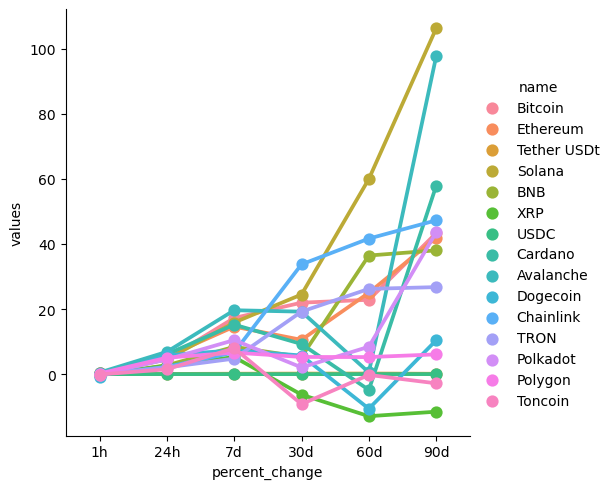

In [39]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [51]:
# Creating a dataframe with the columns we want

df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,52277.45542,2024-02-14 19:35:08.362211
0,Bitcoin,52277.45542,2024-02-14 19:35:08.362211
0,Bitcoin,52374.90758,2024-02-14 19:39:57.118625
0,Bitcoin,52369.98013,2024-02-14 19:40:57.788899
0,Bitcoin,52393.61577,2024-02-14 19:41:58.758170
0,Bitcoin,52388.04251,2024-02-14 19:42:59.945287
0,Bitcoin,52394.91578,2024-02-14 19:44:00.926575


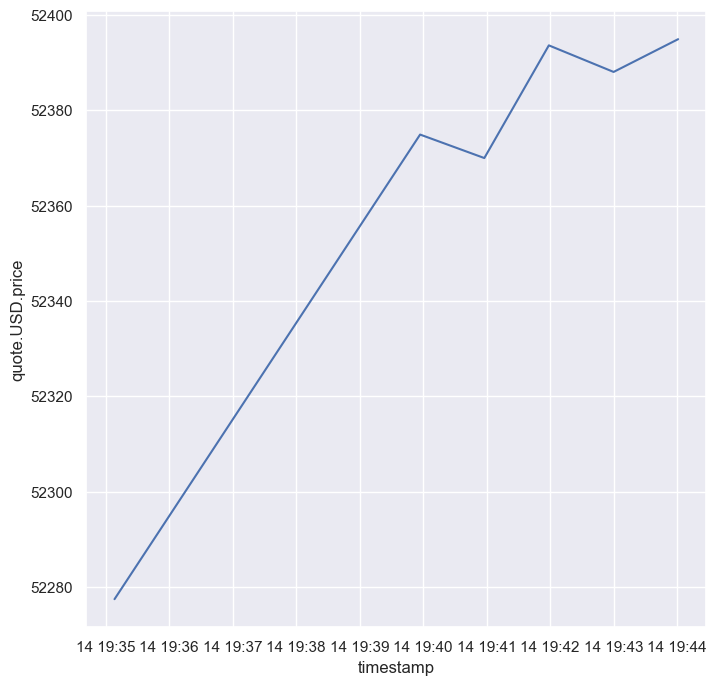

In [76]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 7,7